In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [11]:
df = pd.read_csv('/Users/luismartinez/Documents/IRONHACK/LAB/GitHub/11.2_lab-eda-bivariate/amz_uk_price_prediction_dataset.csv',)

In [13]:
print(df['isBestSeller'].unique())

[False  True]


In [14]:
df['isBestSeller'] = df['isBestSeller'].astype(int)

In [15]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Verificamos los nombres de las columnas de la tabla cruzada
print(crosstab.columns)

# Calculamos la proporción considerando los nombres correctos
crosstab['proporcion_best_seller'] = crosstab.get(1, 0) / (crosstab.get(0, 0) + crosstab.get(1, 0))

Index([0, 1], dtype='int64', name='isBestSeller')


In [16]:
crosstab_sorted = crosstab.sort_values(by='proporcion_best_seller', ascending=False)
print(crosstab_sorted.head(10))

isBestSeller                       0    1  proporcion_best_seller
category                                                         
Grocery                         9008  556                0.058135
Smart Home Security & Lighting    98    6                0.057692
Health & Personal Care          9017  552                0.057686
Mobile Phone Accessories         248   11                0.042471
Power & Hand Tools              8353  306                0.035339
Billiard, Snooker & Pool         241    8                0.032129
Pet Supplies                    9152  285                0.030200
Home Brewing & Wine Making       239    7                0.028455
Wind Instruments                 243    7                0.028000
Mirrors                          243    7                0.028000


In [17]:
from scipy.stats import chi2_contingency

In [21]:
# Realizamos la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :2])
print(f"Chi2: {chi2}, p-valor: {p}")

Chi2: 36540.20270061387, p-valor: 0.0


In [22]:
# Calculamos la V de Cramér para medir la fuerza de la asociación
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * (min_dim - 1)))

In [23]:
n = crosstab.sum().sum()  # Número total de observaciones
min_dim = min(crosstab.shape)  # Dimensión mínima de la tabla
cramers_v_value = cramers_v(chi2, n, min_dim)
print(f"V de Cramér: {cramers_v_value}")

V de Cramér: 0.08646706664522864


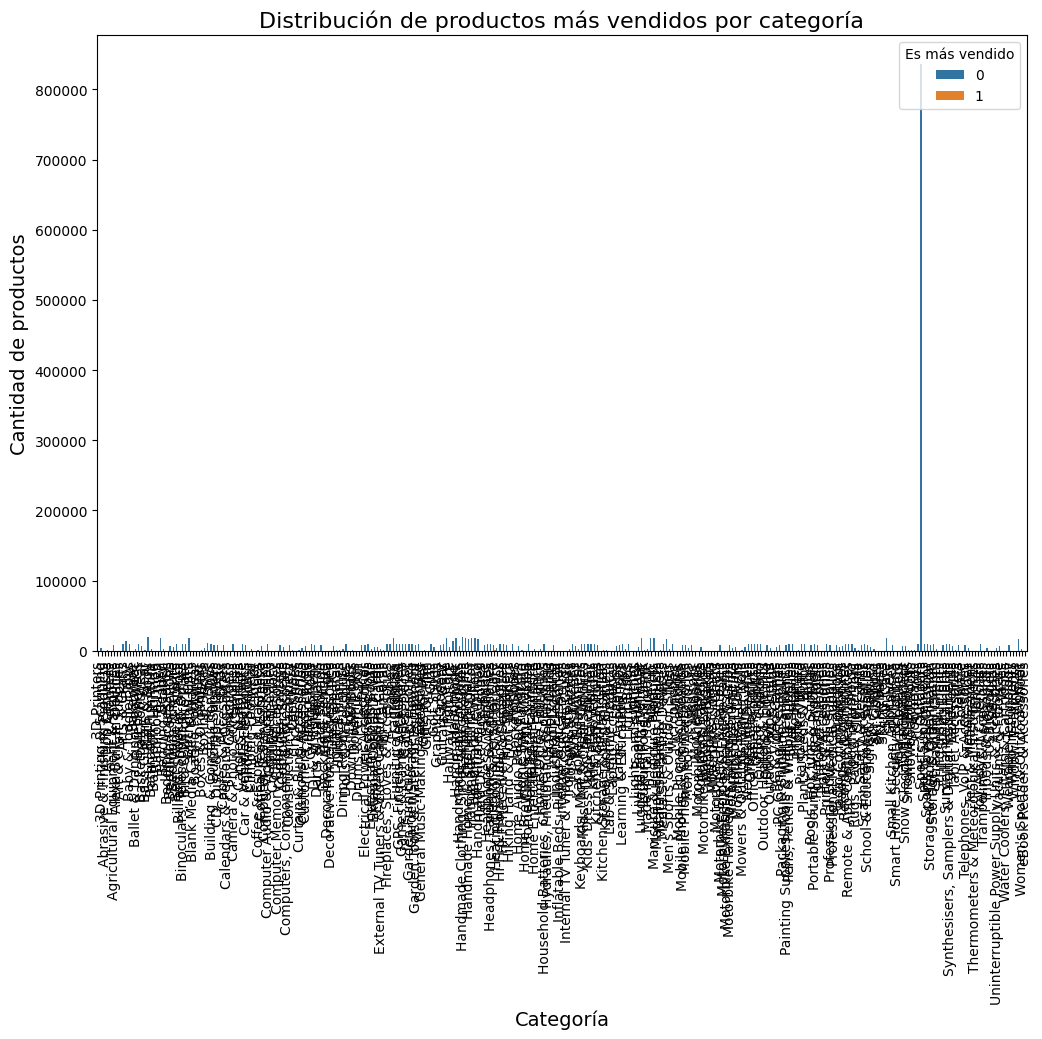

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos una tabla con la proporción de "isBestSeller" por categoría
category_bestseller = df.groupby(['category', 'isBestSeller']).size().reset_index(name='count')

# Creamos la gráfica de barras apiladas con Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=category_bestseller, 
            x='category', 
            y='count', 
            hue='isBestSeller', 
            estimator=sum)

# Personalizamos la gráfica
plt.title('Distribución de productos más vendidos por categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Cantidad de productos', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Es más vendido', loc='upper right')

# Mostramos la gráfica
plt.show()

In [29]:
# Calculamos los límites para identificar outliers usando el método IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtramos los datos para excluir los outliers
data_no_outliers = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]


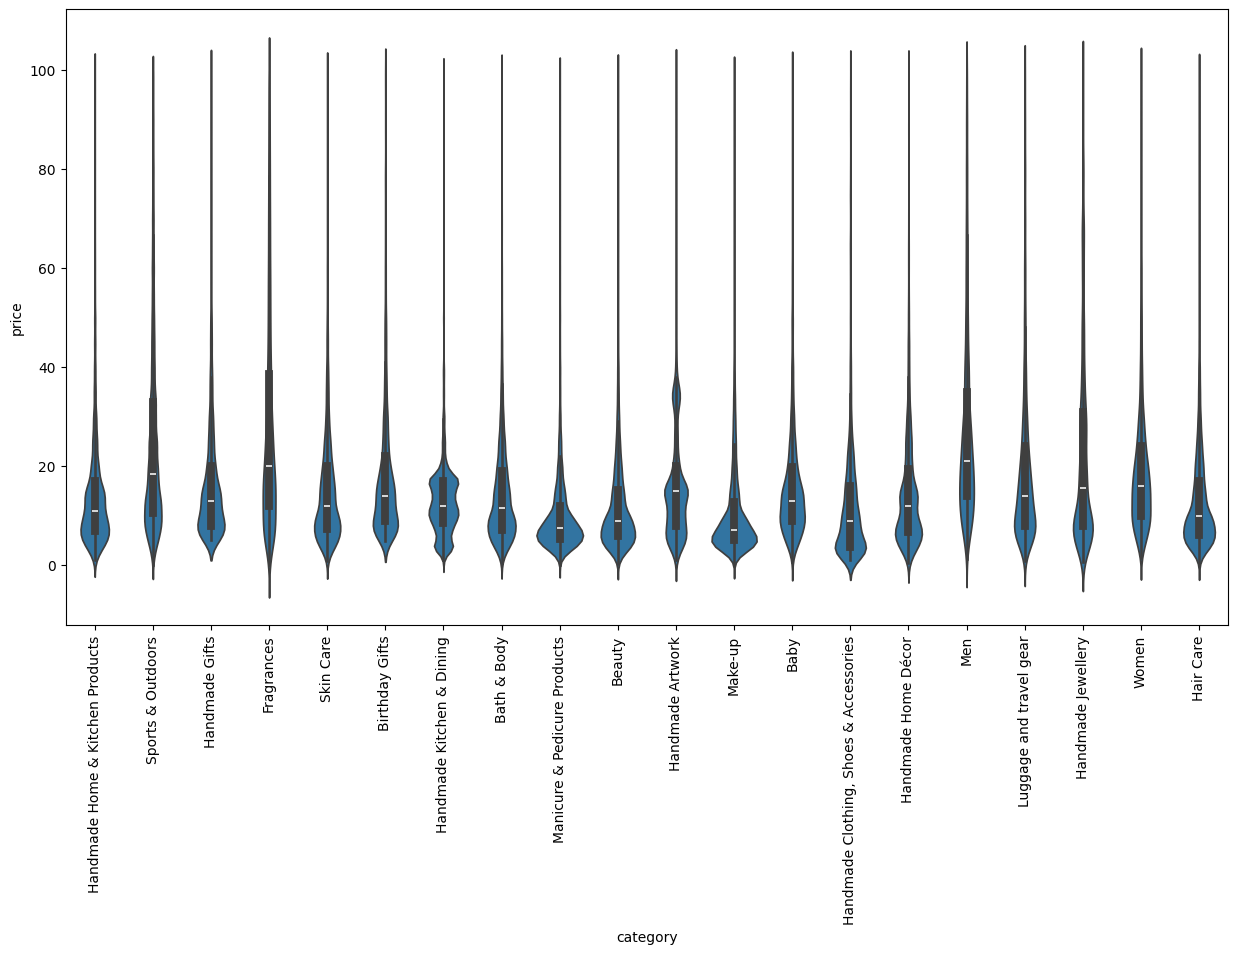

In [62]:
import seaborn as sns

# Seleccionamos las 20 categorías con más productos
categorias_top20 = data_no_outliers['category'].value_counts().head(20).index

# Graficamos un violin plot para visualizar la distribución de precios
plt.figure(figsize=(15, 8))
sns.violinplot(data=data_no_outliers[data_no_outliers['category'].isin(categorias_top20)], x='category', y='price')
plt.xticks(rotation=90)
plt.show()

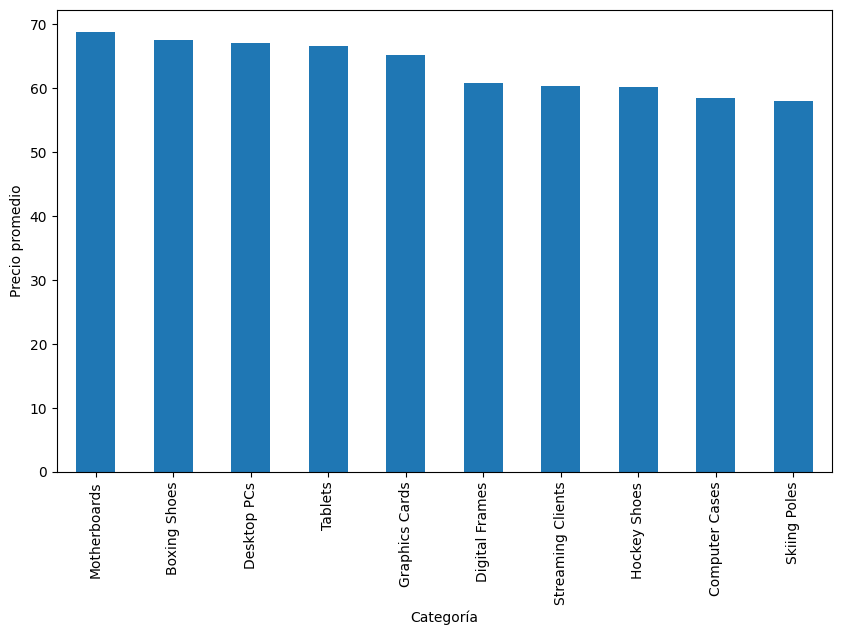

In [34]:
# Calculamos el precio promedio por categoría
precio_promedio = data_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False).head(10)

# Graficamos el precio promedio de las 10 categorías principales
precio_promedio.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Categoría')
plt.ylabel('Precio promedio')
plt.show()

/var/folders/92/2200_6z51r98bv48d0qfl80h0000gn/T/ipykernel_48659/3745628500.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_no_outliers[data_no_outliers['category'].isin(categorias_top10)],


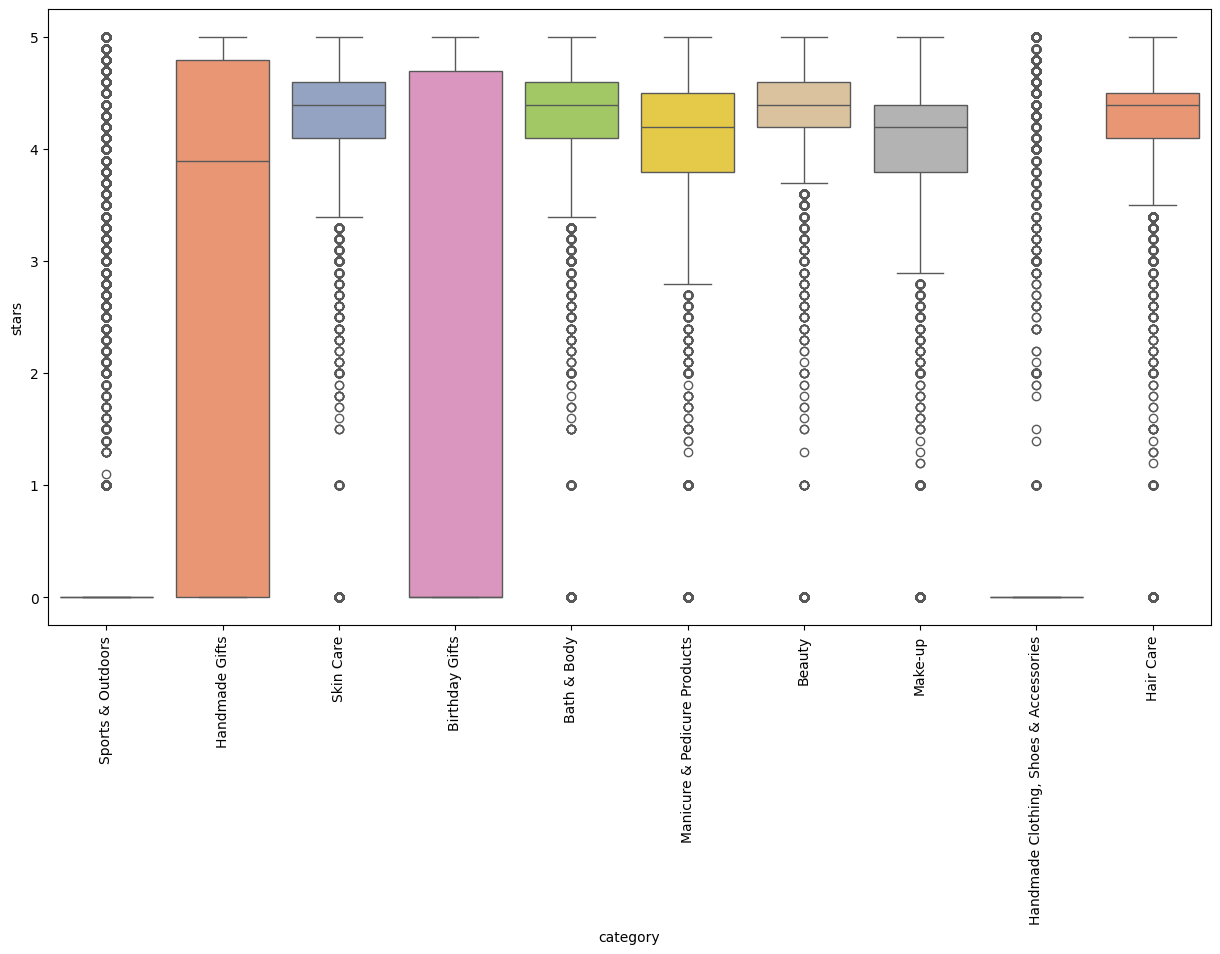

In [48]:
# Seleccionamos las 10 categorías con más productos
categorias_top10 = data_no_outliers['category'].value_counts().head(10).index

# Graficamos un box plot para visualizar las calificaciones por categoría
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_no_outliers[data_no_outliers['category'].isin(categorias_top10)], 
            x='category', y='stars', palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [38]:
# Calculamos la correlación entre precio y calificación
correlacion = data_no_outliers[['price', 'stars']].corr()

In [43]:
data_no_outliers_filtered = data_no_outliers[data_no_outliers['stars'] > 0]

/var/folders/92/2200_6z51r98bv48d0qfl80h0000gn/T/ipykernel_48659/360187870.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data_no_outliers_filtered, x='stars', y='price', alpha=0.7, palette='Set2')


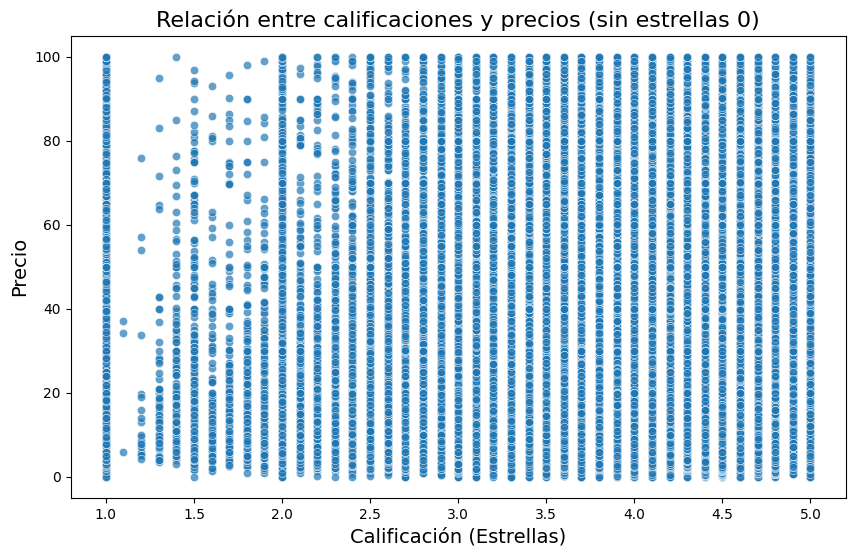

In [60]:
# Gráfico de dispersión para mostrar la relación entre precio y calificación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_no_outliers_filtered, x='stars', y='price', alpha=0.7, palette='Set2')
plt.title('Relación entre calificaciones y precios (sin estrellas 0)', fontsize=16)
plt.xlabel('Calificación (Estrellas)', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.show()

In [51]:
numerical_data = data_no_outliers_filtered.select_dtypes(include=['float64', 'int64'])


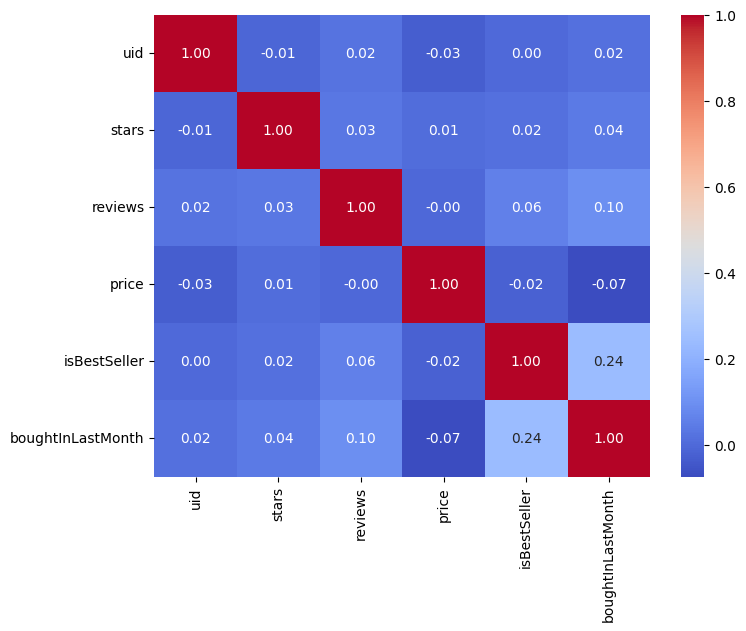

In [57]:
# Crear la matriz de correlación
correlation_matrix = numerical_data.corr()

# Creo el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.show()

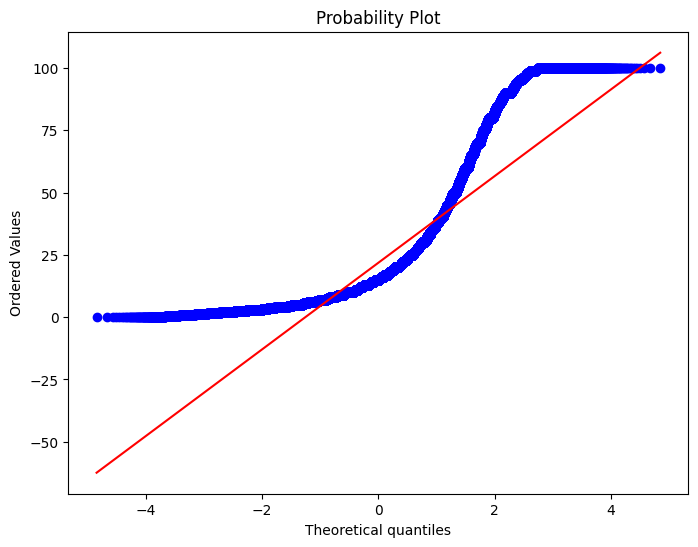

In [59]:
import scipy.stats as stats

# Creo el QQ plot
plt.figure(figsize=(8, 6)) 
stats.probplot(data_no_outliers_filtered['price'], dist="norm", plot=plt)

# Mostrar el QQ plot
plt.show()